### Из изменений в сравнении с Test_8 // короткое diff-содержание .ipynb
I. Аналогично Test_8, но для двуслойных моделей (layer == 'second')

### Импорт библиотек

In [1]:
import os
import sqlite3
import pandas as pd

In [2]:
project_dir_path = os.environ["NIR_1_sem_magistracy"]

In [3]:
import sys

lib_dir = 'lib'
lib_dir_path = os.path.join(project_dir_path, lib_dir)
sys.path.append(lib_dir_path)
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

### Сбор всех данных в единый df ('Aleksashina_Керов_Андрей.db' + 'other.db')

In [4]:
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)

In [6]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'train.db', 'clear_emotions.db', 'other.db'])

In [7]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

Index_    Video_Time    Neutral        Happy  \
0         00:00:00.000_Керов Андрей_3  00:00:00.000  0.9878594  0.003336495   
1         00:00:00.030_Керов Андрей_3  00:00:00.030  0.9878824  0.003385304   
2         00:00:00.060_Керов Андрей_3  00:00:00.060  0.9879055  0.003434114   
3         00:00:00.090_Керов Андрей_3  00:00:00.090  0.9879286  0.003482923   
4         00:00:00.121_Керов Андрей_3  00:00:00.121  0.9880258  0.003506238   
...                               ...           ...        ...          ...   
20842  00:01:51.700_Куликов Алексей_1  00:01:51.700  0.9315634   3.7894e-05   
20843  00:01:51.800_Куликов Алексей_1  00:01:51.800  0.9356429   3.1707e-05   
20844  00:01:51.900_Куликов Алексей_1  00:01:51.900  0.9384109   2.6894e-05   
20845  00:01:52.000_Куликов Алексей_1  00:01:52.000  0.9407817   2.3125e-05   
20846  00:01:52.100_Куликов Алексей_1  00:01:52.100  0.9421062   2.0179e-05   

               Sad        Angry    Surprised       Scared    Disgusted  \
0      0.008397053  0.001824096  0.007600656   6.9452e-05  0.000141165   
1      0.008362157  0.001782566  0.007644675   8.0761e-05  0.000138702   
2      0.008327262  0.001741036  0.007688694    9.207e-05   0.00013624   
3      0.008292366  0.001699506  0.007732714  0.000103379  0.000133777   
4      0.008183754   0.00164466   0.00778434  0.000113112  0.000130297   
...            ...          ...          ...          ...          ...   
20842   0.02397099   0.06796286   0.02635098  0.000250268  0.000691861   
20843    0.0237766   0.06259692   0.02374056  0.000229404  0.000798602   
20844     0.023437   0.05935737   0.02117987  0.000212627  0.000848645   
20845   0.02303489   0.05651735   0.01901644  0.000197417  0.000877875   
20846   0.02311718    0.0544879   0.01772361  0.000184181  0.000897447   

            Valence  ... Action_Unit_12___Right___Lip_Corner_Puller  \
0      -0.005060558  ...                                        0.0   
1      -0.004976853  ...                                        0.0   
2      -0.004893148  ...                                        0.0   
3      -0.004809443  ...                                        0.0   
4      -0.004677515  ...                                        0.0   
...             ...  ...                                        ...   
20842   -0.06792496  ...                                        0.0   
20843   -0.06256521  ...                                        0.0   
20844   -0.05933048  ...                                        0.0   
20845   -0.05649422  ...                                        0.0   
20846   -0.05446772  ...                                        0.0   

      Action_Unit_14___Right___Dimpler  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
20842                              0.0   
20843                              0.0   
20844                              0.0   
20845                              0.0   
20846                              0.0   

      Action_Unit_15___Right___Lip_Corner_Depressor  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
20842                                           0.0   
20843                                           0.0   
20844                                           0.0   
20845                                           0.0   
20846                                           0.0   

      Action_Unit_20___Right___Lip_Stretcher  \
0                                        0.0   
1                                        0.0   
2                             

### Изменение index'а в df

In [8]:
tools.make_valid_df(df, fields)

In [9]:
df

Index_    Video_Time  \
Index_                                                                         
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  00:00:00.000   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  00:00:00.030   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  00:00:00.060   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  00:00:00.090   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  00:00:00.121   
...                                                        ...           ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  00:01:51.700   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  00:01:51.800   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  00:01:51.900   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  00:01:52.000   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  00:01:52.100   

                                 Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  ...  \
Index_                                                                    ...   
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061  ...   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977  ...   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893  ...   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809  ...   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678  ...   
...                                   ...       ...        ...       ...  ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925  ...   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565  ...   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330  ...   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494  ...   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468  ...   

                                Action_Unit_12___Right___Lip_Corner_Puller  \
Index_                                                                       
00:00:00.000_Керов Андрей_3                                            0.0   
00:00:00.030_Керов Андрей_3                                            0.0   
00:00:00.060_Керов Андрей_3                                            0.0   
00:00:00.090_Керов Андрей_3                                            0.0   
00:00:00.121_Керов Андрей_3                                            0.0   
...                                                                    ...   
00:01:51.700_Куликов Алексей_1                                         0.0   
00:01:51.800_Куликов Алексей_1                                         0.0   
00:01:51.900_Куликов Алексей_1                                         0.0   
00:01:52.000_Куликов Алексей_1                                         0.0   
00:01:52.100_Куликов Алексей_1                                

In [10]:
# df_train_, df_other = tools.groupby(df, other=True)
# df_train_

### Сбор всех clear эмоций в единый df_clear ('clear_emotions.db')

In [11]:
name_db = 'clear_emotions'
db_path = os.path.join(db_dir_path, f'{name_db}.db')
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
tools.make_valid_df(df_clear, fields)
df_clear = df_clear[fields]
df_clear

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:01.300_Смолин Александр_1     0.97   0.00  0.02   0.03       0.01   
00:00:07.575_Керов Андрей_8         0.97   0.01  0.00   0.00       0.04   
00:00:03.000_Боим_9                 0.97   0.01  0.00   0.00       0.04   
00:00:05.700_Provotorov_3           0.97   0.00  0.02   0.03       0.01   
00:00:09.848_Korsakov_9             0.97   0.00  0.00   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7              0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:01.300_Смолин Александр_1     0.0       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8         0.0       0.00     0.01     0.31  
00:00:03.000_Боим_9                 0.0       0.00     0.01     0.31  
00:00:05.700_Provotorov_3           0.0       0.01    -0.03     0.23  
00:00:09.848_Korsakov_9             0.0       0.01    -0.01     0.30  
...                                 ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.0       1.00    -1.00     0.63  

[530 rows x 9 columns]

In [12]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [13]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [14]:
models = []

In [18]:
# def removeprefix(text, prefix):
#     if text.startswith(prefix):
#         return text[len(prefix):]
#     return text

In [19]:
# removeprefix('model_third_6.7.5_2', 'model_third_')

In [20]:
# removeprefix('7.2.7_3', 'model_third_')

'7.2.7_3'

In [21]:
# '7.2.7_3'.split('_')

['7.2.7', '3']

In [22]:
# '7.2.7'.split('_')

['7.2.7']

### Загрузка всех 64 моделей // layer = 'second' ; v = 1

In [43]:
# v = 1
# layer = 'third'
# dir_path = f'../saved_models/{layer}/_{v}'
# models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
# models

['model_third_6.8.5',
 'model_third_9.8.5',
 'model_third_8.2.3',
 'model_third_7.9.9',
 'model_third_9.10.5',
 'model_third_9.7.7',
 'model_third_9.10.3',
 'model_third_8.8.5',
 'model_third_8.3.3',
 'model_third_7.6.3',
 'model_third_9.2.6',
 'model_third_9.3.6',
 'model_third_7.6.8',
 'model_third_6.10.7',
 'model_third_9.2.3',
 'model_third_9.6.9',
 'model_third_7.7.6',
 'model_third_9.7.3',
 'model_third_9.3.4',
 'model_third_8.9.8',
 'model_third_9.4.6',
 'model_third_9.2.4',
 'model_third_6.10.9',
 'model_third_9.3.5',
 'model_third_7.3.5',
 'model_third_6.6.7',
 'model_third_7.8.7',
 'model_third_7.10.6',
 'model_third_7.8.3',
 'model_third_9.5.4',
 'model_third_6.8.8',
 'model_third_9.5.9',
 'model_third_7.3.6',
 'model_third_9.2.7',
 'model_third_7.2.8',
 'model_third_9.2.9',
 'model_third_9.6.2',
 'model_third_7.2.2',
 'model_third_9.3.9',
 'model_third_8.4.5',
 'model_third_7.10.8',
 'model_third_7.2.6',
 'model_third_7.3.7',
 'model_third_8.8.4',
 'model_third_7.9.3',
 'mo

In [ ]:
# for i in range(len(models)):
#     model_layers_v = removeprefix(models[i], 'model_third_')
#     N = model_layers_v.split('_')[0]
#     path = os.path.join(dir_path, models[i])
#     model = load_model(path)
#     nn = NeuralNetwork(df[pa_fields], df[seven_fields], )
#     models[i] = [model_name, N, nn]

In [78]:
# def load_models(path_to_saved_models, df, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
#     for i in range(len(models)):
#         model_layers_v = removeprefix(models[i], f'model_{layer}_')
#         N = model_layers_v.split('_')[0]
#         path = os.path.join(dir_path, models[i])
#         model = load_model(path)
#         nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
#         models[i] = [model_layers_v, N, nn]
    
#     models.sort(key=lambda x: list(map(int, x[1].split('.'))))
    
#     return models

In [15]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

In [16]:
layer = 'second'
v = 1
models = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models

2024-03-18 12:33:02.108549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-18 12:33:02.108588: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:33:05.817558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-18 12:33:05.817599: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-18 12:33:05.817633: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ivan-PC): /proc/driver/nvidia/version does not exist
2024-03-18 12:33:05.818872: I tensorflow/core/platform/cpu_feature_gu

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['2.2_1', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f7288d4e6a0>],
 ['2.3_1', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f72a0348a90>],
 ['2.4_1', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f726e14a880>],
 ['2.5_1', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f72a01550d0>],
 ['2.6_1', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f7289455190>],
 ['2.7_1', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f726ff04070>],
 ['2.8_1', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f72884829a0>],
 ['2.9_1', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f7288350a90>],
 ['3.2_1', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f726f0c9b50>],
 ['3.3_1', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f726f64be80>],
 ['3.4_1', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f7288c6e3d0>],
 ['3.5_1', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f728867b4c0>],
 ['3.6_1', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [17]:
len(models)

64

In [ ]:
# v = 1
# i = 0
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

In [2]:
# v = 5
# i = 0
# seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

7.9.8


### Вычисление df_metrics с помощью tools.create_df_metrics 

In [18]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [19]:
metrics = tools.metrics
metrics

['mean', 'norm', 'stat']

In [43]:
# def create_df_metrics(models, test, df_metrics, layer='first'):
#     for model_list in models:
#         entry_dict = {'model': model_list[0], 'layer': layer, 'N': model_list[1]}
#         entry_dict.update({metric: model_list[2].model_metric(test, metric) for metric in metrics})
#         df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     return df_metrics

In [20]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [21]:
layer

'second'

In [22]:
models

[['2.2_1', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f7288d4e6a0>],
 ['2.3_1', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f72a0348a90>],
 ['2.4_1', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f726e14a880>],
 ['2.5_1', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f72a01550d0>],
 ['2.6_1', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f7289455190>],
 ['2.7_1', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f726ff04070>],
 ['2.8_1', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f72884829a0>],
 ['2.9_1', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f7288350a90>],
 ['3.2_1', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f726f0c9b50>],
 ['3.3_1', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f726f64be80>],
 ['3.4_1', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f7288c6e3d0>],
 ['3.5_1', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f728867b4c0>],
 ['3.6_1', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [24]:
df_metrics = tools.create_df_metrics(models, test, df_metrics, layer=layer)
df_metrics

model   layer    N      mean      norm      stat
0   2.2_1  second  2.2  0.079602  0.219791  0.519760
1   2.3_1  second  2.3  0.067630  0.184987  0.477011
2   2.4_1  second  2.4  0.064355  0.174966  0.488077
3   2.5_1  second  2.5  0.087434  0.262844  0.507587
4   2.6_1  second  2.6  0.065946  0.181153  0.484206
..    ...     ...  ...       ...       ...       ...
59  9.5_1  second  9.5  0.054982  0.151440  0.500078
60  9.6_1  second  9.6  0.053667  0.146367  0.495178
61  9.7_1  second  9.7  0.057731  0.158434  0.518432
62  9.8_1  second  9.8  0.054054  0.149069  0.517090
63  9.9_1  second  9.9  0.053672  0.149908  0.520238

[64 rows x 6 columns]

In [25]:
df_metrics.sort_values('mean')[:15]

model   layer    N      mean      norm      stat
53  8.7_1  second  8.7  0.052475  0.143937  0.518746
55  8.9_1  second  8.9  0.052704  0.144394  0.506074
45  7.7_1  second  7.7  0.053041  0.146264  0.508565
35  6.5_1  second  6.5  0.053256  0.147293  0.499225
47  7.9_1  second  7.9  0.053260  0.146635  0.510857
44  7.6_1  second  7.6  0.053596  0.146118  0.512590
60  9.6_1  second  9.6  0.053667  0.146367  0.495178
63  9.9_1  second  9.9  0.053672  0.149908  0.520238
31  5.9_1  second  5.9  0.054028  0.148495  0.520167
62  9.8_1  second  9.8  0.054054  0.149069  0.517090
30  5.8_1  second  5.8  0.054132  0.150584  0.538616
39  6.9_1  second  6.9  0.054140  0.149791  0.507213
36  6.6_1  second  6.6  0.054544  0.150228  0.514389
27  5.5_1  second  5.5  0.054756  0.150779  0.511285
59  9.5_1  second  9.5  0.054982  0.151440  0.500078

### Сохранение df_metrics с помощью tools.save_to_db

In [26]:
v

1

In [27]:
layer

'second'

In [28]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_1/df_metrics_1.db'

In [30]:
tools.save_to_db(db_path, name_db, df_metrics)

In [35]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model   layer    N                mean               norm  \
0   2.2_1  second  2.2  0.0796017252319503  0.219791188935369   
1   2.3_1  second  2.3  0.0676295054535479  0.184986931158898   
2   2.4_1  second  2.4  0.0643545800493097  0.174965926667183   
3   2.5_1  second  2.5  0.0874341204470315  0.262844422691776   
4   2.6_1  second  2.6  0.0659456958809599  0.181153007586477   
..    ...     ...  ...                 ...                ...   
59  9.5_1  second  9.5  0.0549816472563711  0.151440155670422   
60  9.6_1  second  9.6  0.0536668716096041  0.146367304215866   
61  9.7_1  second  9.7  0.0577313081286284  0.158434466113156   
62  9.8_1  second  9.8  0.0540538062703459  0.149068906716338   
63  9.9_1  second  9.9  0.0536718412811641  0.149907889968504   

                 stat  
0   0.519759595394135  
1   0.477011263370514  
2   0.488077312707901  
3   0.507586717605591  
4   0.484205991029739  
..                ...  
59  0.500078499317169  
60  0.495178133249283  
61  0.518431723117828  
62  0.517090022563934  
63  0.520237803459167  

[64 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [36]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

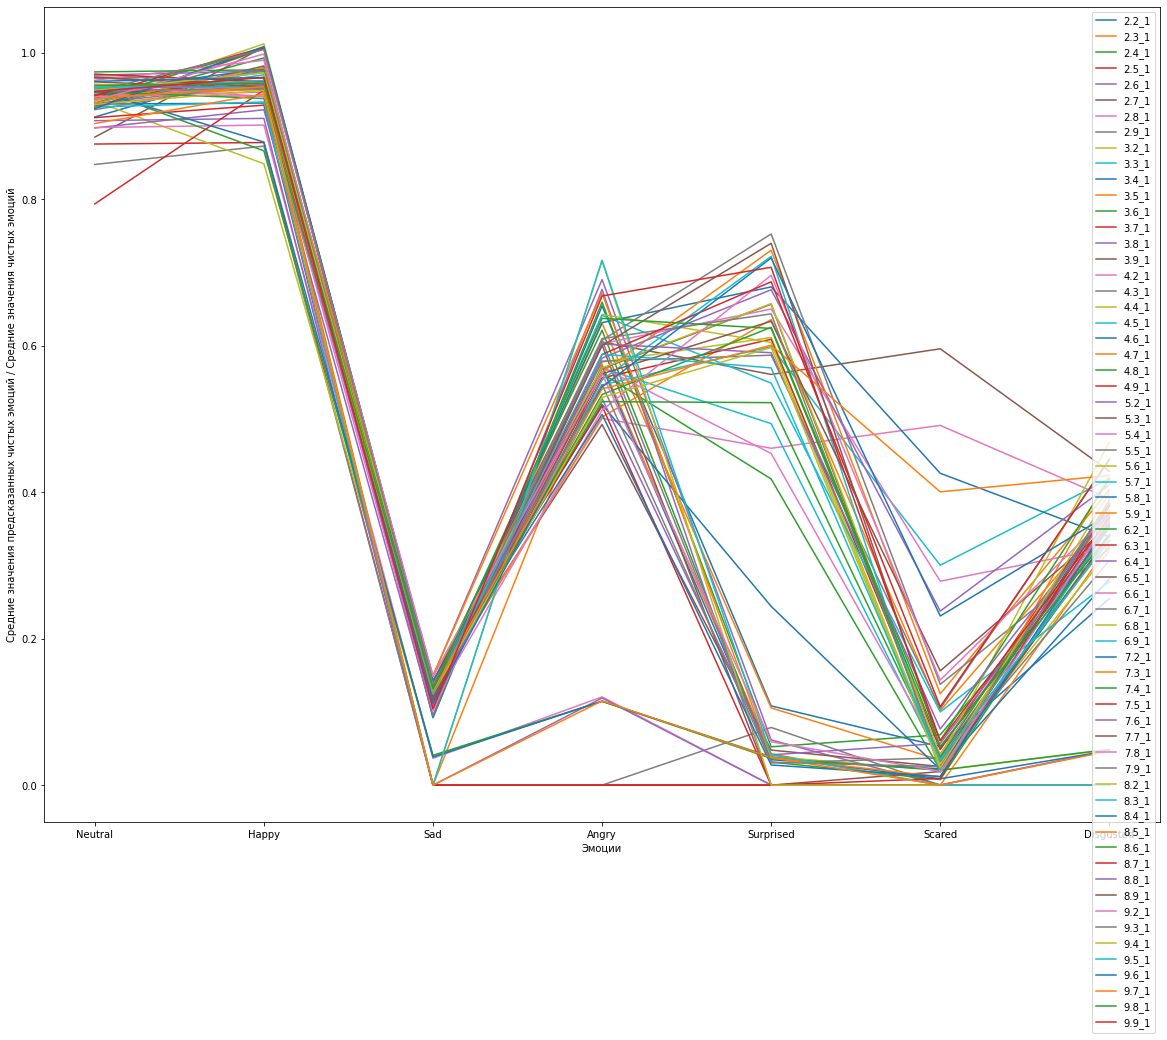

In [37]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [38]:
df_clear_metrics.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry Surprised    Scared  \
55  8.9_1  0.966876  0.953433  0.115253  0.600112  0.739952  0.051434   
46  7.8_1  0.962649  0.989977  0.112799  0.511971  0.696261   0.14352   
38  6.8_1  0.952629  0.961622  0.147796  0.569755  0.657581  0.039828   
63  9.9_1  0.947284  0.966458  0.104238  0.668034  0.707238  0.060441   
37  6.7_1  0.922476   0.96153  0.118134  0.607664  0.752703  0.137662   
31  5.9_1  0.955299  0.958692  0.112334  0.564045  0.730553  0.124705   
36  6.6_1  0.955617  0.940557  0.101638  0.602781  0.650208  0.278521   
6   2.8_1  0.942602     0.941  0.130862  0.500938  0.460052  0.491264   
53  8.7_1  0.971071   0.96068  0.113241  0.588129  0.687345  0.107102   
60  9.6_1  0.961157  0.966416  0.112079  0.543754  0.719949  0.230961   
19  4.5_1  0.945366    0.9729  0.128338  0.546545   0.59878  0.300321   
44  7.6_1  0.969583  0.975184  0.110075  0.583188  0.676532   0.23765   
61  9.7_1  0.937833  0.953885  0.128353  0.540973  0.600776  0.400499   
30  5.8_1  0.947146  0.978224   0.12715  0.631618  0.680409  0.425863   
15  3.9_1  0.926918  0.982196  0.141115   0.60523  0.560861  0.595912   

   Disgusted     clear  
55  0.351792  0.539836  
46  0.370063  0.541034  
38   0.46859  0.542543  
63  0.365228   0.54556  
37  0.323307  0.546211  
31  0.402924  0.549793  
36  0.324662  0.550569  
6   0.391291  0.551144  
53  0.444443  0.553145  
60  0.370031  0.557764  
19  0.418449  0.558671  
44  0.410154  0.566052  
61  0.422911  0.569319  
30  0.338982  0.589913  
15  0.428626  0.605837

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [40]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_1/df_clear_metrics_1.db'

In [42]:
tools.save_to_db(db_path, name_db, df_clear_metrics)

In [43]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0   2.2_1  0.912431953731521  0.979848093624686    0.0919939587025559   
1   2.3_1  0.928004473222716  0.955844744013509  6.73571872692523e-09   
2   2.4_1  0.931896112675228  0.993041209624003    0.0930149385649504   
3   2.5_1  0.875511384054115  0.877590935938785  2.20509073797724e-15   
4   2.6_1  0.930759743248402  0.957638357651721     0.149029072982196   
..    ...                ...                ...                   ...   
59  9.5_1  0.951714018311494  0.962176026803723     0.124930655332828   
60  9.6_1  0.961157260415116  0.966415542391492     0.112078596266627   
61  9.7_1  0.937832547927735  0.953885272272353     0.128352970309945   
62  9.8_1  0.955301672858982   0.95826803191131     0.131414546122075   
63  9.9_1  0.947283880884342  0.966457837836997     0.104237865013101   

                   Angry             Surprised                Scared  \
0      0.654380919635644      0.10816212885905    0.0527595151581016   
1      0.574674862268508    0.0429459788614549  7.68322900726429e-07   
2      0.659595587428838    0.0523948942293634    0.0687616858996597   
3   2.51774353472622e-09  3.18203367570025e-06  3.16553836520423e-10   
4      0.690473158134185    0.0616932421135687  0.000354837553173888   
..                   ...                   ...                   ...   
59       0.5885717276236     0.569825830187874    0.0343386412543409   
60     0.543754142529767     0.719948640045315     0.230961176110249   
61     0.540973447445811     0.600776297918536     0.400499122984269   
62     0.637420595318184     0.623681567624843    0.0528325052822338   
63     0.668034130661741      0.70723843624229    0.0604408446188067   

               Disgusted              clear  
0      0.254811177164223   0.43634110669654  
1      0.328064275608321  0.404219301290447  
2      0.340995096190754  0.448528503516114  
3   3.37210852451828e-11  0.250443643556371  
4   3.91058778761637e-13  0.398564058811948  
..                   ...                ...  
59     0.334514784738344  0.509438812036029  
60     0.370030638075223  0.557763713690541  
61     0.422910772598076  0.569318633065246  
62     0.342599946589863  0.528788409386784  
63     0.365227554090577  0.545560078478265  

[64 rows x 9 columns]

### По аналогии для других v (2-5)

### Загрузка всех 64 моделей // layer = 'second' ; v = 2

In [44]:
layer = 'second'
v = 2
models_2 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['2.2_2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f726cc553a0>],
 ['2.3_2', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f726cf2ea00>],
 ['2.4_2', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f726196d220>],
 ['2.5_2', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f726d69db50>],
 ['2.6_2', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f7235227460>],
 ['2.7_2', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f7234668a90>],
 ['2.8_2', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f72247aafd0>],
 ['2.9_2', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f726d6114c0>],
 ['3.2_2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f72353d30a0>],
 ['3.3_2', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f72242094c0>],
 ['3.4_2', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f7263c46310>],
 ['3.5_2', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f72352be970>],
 ['3.6_2', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [45]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [46]:
layer

'second'

In [47]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [45]:
df_metrics_2 = tools.create_df_metrics(models_2, test, df_metrics_2, layer=layer)
df_metrics_2

model   layer    N      mean      norm      stat
0   2.2_2  second  2.2  0.109211  0.309075  0.474702
1   2.3_2  second  2.3  0.092502  0.246138  0.452962
2   2.4_2  second  2.4  0.084777  0.224502  0.459267
3   2.5_2  second  2.5  0.112793  0.366444  0.462559
4   2.6_2  second  2.6  0.094495  0.245563  0.467889
..    ...     ...  ...       ...       ...       ...
59  9.5_2  second  9.5  0.067859  0.192021  0.481607
60  9.6_2  second  9.6  0.077945  0.213585  0.477428
61  9.7_2  second  9.7  0.076820  0.217767  0.495396
62  9.8_2  second  9.8  0.076117  0.210920  0.499687
63  9.9_2  second  9.9  0.073377  0.205657  0.497745

[64 rows x 6 columns]

In [50]:
df_metrics_2.sort_values('mean')[:15]

model   layer    N      mean      norm      stat
59  9.5_2  second  9.5  0.067859  0.192021  0.481607
39  6.9_2  second  6.9  0.068700  0.187794  0.482810
45  7.7_2  second  7.7  0.071668  0.197992  0.486251
52  8.6_2  second  8.6  0.072215  0.197312  0.480296
27  5.5_2  second  5.5  0.073160  0.205780  0.489748
28  5.6_2  second  5.6  0.073205  0.200201  0.478942
63  9.9_2  second  9.9  0.073377  0.205657  0.497745
37  6.7_2  second  6.7  0.073537  0.207244  0.491961
33  6.3_2  second  6.3  0.073834  0.226469  0.456982
48  8.2_2  second  8.2  0.073839  0.215817  0.449477
53  8.7_2  second  8.7  0.073974  0.203550  0.493023
9   3.3_2  second  3.3  0.074253  0.208206  0.467862
35  6.5_2  second  6.5  0.074382  0.204647  0.488816
20  4.6_2  second  4.6  0.074388  0.210452  0.466771
26  5.4_2  second  5.4  0.074933  0.207979  0.477566

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [60]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [61]:
len(models_2)

64

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

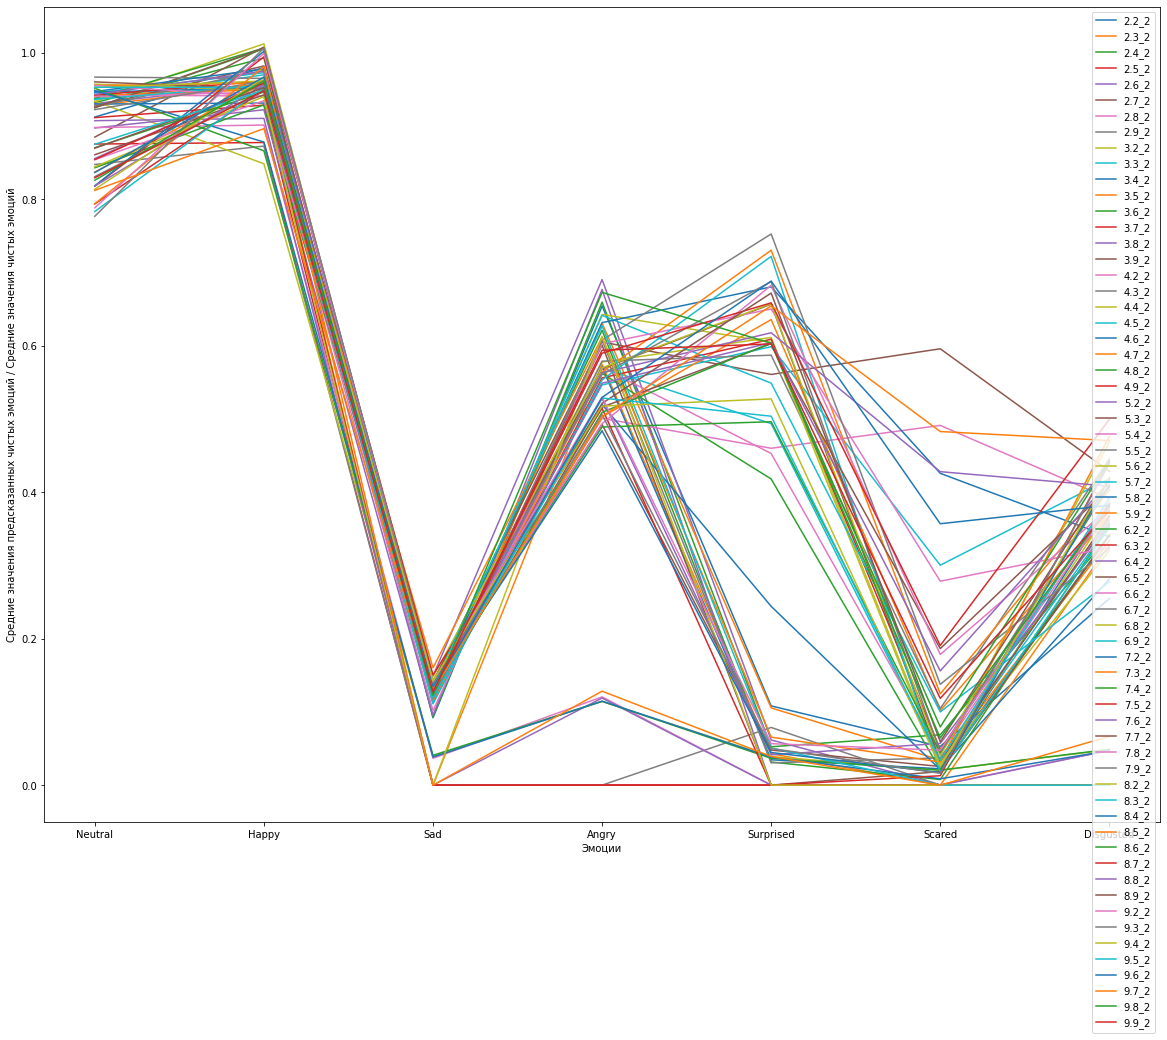

In [62]:
kwargs = {
    'models': models_2, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [63]:
df_clear_metrics_2

model   Neutral     Happy       Sad     Angry Surprised    Scared  \
0   2.2_2  0.912432  0.979848  0.091994  0.654381  0.108162   0.05276   
1   2.3_2  0.928004  0.955845       0.0  0.574675  0.042946  0.000001   
2   2.4_2  0.931896  0.993041  0.093015  0.659596  0.052395  0.068762   
3   2.5_2  0.875511  0.877591       0.0       0.0  0.000003       0.0   
4   2.6_2   0.93076  0.957638  0.149029  0.690473  0.061693  0.000355   
..    ...       ...       ...       ...       ...       ...       ...   
59  9.5_2  0.875229   0.94893  0.119779  0.528669  0.503806  0.033832   
60  9.6_2  0.836633  0.966993  0.128207  0.529495  0.688407  0.356996   
61  9.7_2  0.812277  0.896557  0.128397  0.503532  0.654523  0.482882   
62  9.8_2  0.826043  0.961825  0.122716  0.672987  0.603504  0.064401   
63  9.9_2  0.829381  0.948435  0.127429  0.593944  0.602572  0.118454   

   Disgusted     clear  
0   0.254811  0.436341  
1   0.328064  0.404219  
2   0.340995  0.448529  
3        0.0  0.250444  
4        0.0  0.398564  
..       ...       ...  
59  0.392402  0.486092  
60  0.382169  0.555557  
61   0.47061  0.564111  
62  0.380887  0.518909  
63  0.374761  0.513568  

[64 rows x 9 columns]

In [64]:
df_clear_metrics_2.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry Surprised    Scared  \
35  6.5_2   0.96043  0.950667   0.13032  0.568804  0.656858  0.032848   
28  5.6_2  0.957312  0.949056  0.117591   0.64287  0.604636  0.026852   
27  5.5_2  0.966902  0.965193  0.119349  0.579028  0.587168  0.104567   
38  6.8_2  0.952629  0.961622  0.147796  0.569755  0.657581  0.039828   
37  6.7_2  0.922476   0.96153  0.118134  0.607664  0.752703  0.137662   
31  5.9_2  0.955299  0.958692  0.112334  0.564045  0.730553  0.124705   
36  6.6_2  0.955617  0.940557  0.101638  0.602781  0.650208  0.278521   
6   2.8_2  0.942602     0.941  0.130862  0.500938  0.460052  0.491264   
53  8.7_2  0.854323  0.958932  0.125116  0.589843   0.65862  0.190685   
60  9.6_2  0.836633  0.966993  0.128207  0.529495  0.688407  0.356996   
19  4.5_2  0.945366    0.9729  0.128338  0.546545   0.59878  0.300321   
61  9.7_2  0.812277  0.896557  0.128397  0.503532  0.654523  0.482882   
44  7.6_2   0.85574  0.958152  0.128329  0.563179  0.617778  0.428095   
30  5.8_2  0.947146  0.978224   0.12715  0.631618  0.680409  0.425863   
15  3.9_2  0.926918  0.982196  0.141115   0.60523  0.560861  0.595912   

   Disgusted     clear  
35  0.366706  0.523805  
28  0.375096  0.524773  
27  0.445281  0.538213  
38   0.46859  0.542543  
37  0.323307  0.546211  
31  0.402924  0.549793  
36  0.324662  0.550569  
6   0.391291  0.551144  
53  0.499456  0.553854  
60  0.382169  0.555557  
19  0.418449  0.558671  
61   0.47061  0.564111  
44  0.408208   0.56564  
30  0.338982  0.589913  
15  0.428626  0.605837

### Строим графики метрик ['mean', 'norm', 'stat', 'clear'] для моделей с помощью tools.plot_metrics и tools.create_metric_df_dict

In [65]:
metrics = tools.metrics + ['clear']

In [66]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':     model   layer    N      mean      norm      stat
 0   2.2_2  second  2.2  0.109211  0.309075  0.474702
 1   2.3_2  second  2.3  0.092502  0.246138  0.452962
 2   2.4_2  second  2.4  0.084777  0.224502  0.459267
 3   2.5_2  second  2.5  0.112793  0.366444  0.462559
 4   2.6_2  second  2.6  0.094495  0.245563  0.467889
 ..    ...     ...  ...       ...       ...       ...
 59  9.5_2  second  9.5  0.067859  0.192021  0.481607
 60  9.6_2  second  9.6  0.077945  0.213585  0.477428
 61  9.7_2  second  9.7  0.076820  0.217767  0.495396
 62  9.8_2  second  9.8  0.076117  0.210920  0.499687
 63  9.9_2  second  9.9  0.073377  0.205657  0.497745
 
 [64 rows x 6 columns],
 'norm':     model   layer    N      mean      norm      stat
 0   2.2_2  second  2.2  0.109211  0.309075  0.474702
 1   2.3_2  second  2.3  0.092502  0.246138  0.452962
 2   2.4_2  second  2.4  0.084777  0.224502  0.459267
 3   2.5_2  second  2.5  0.112793  0.366444  0.462559
 4   2.6_2  second  2.6  0.094495  0.245

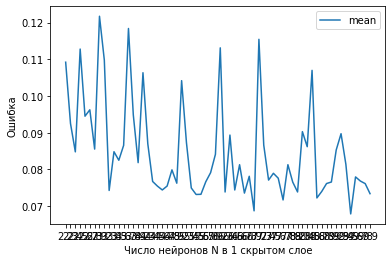

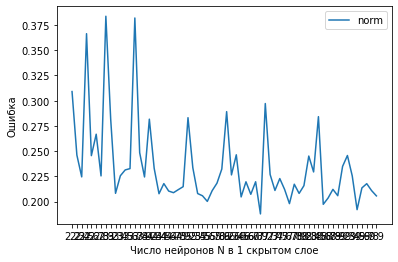

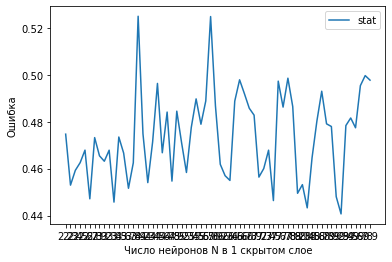

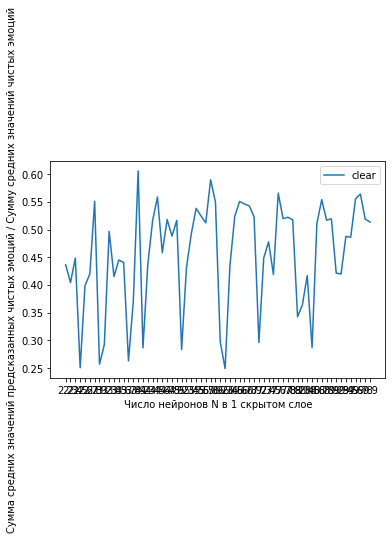

In [67]:
tools.plot_metrics(metric_df_dict)

### Сохранение df_metrics с помощью tools.save_to_db

In [68]:
v

2

In [69]:
layer

'second'

In [70]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_2/df_metrics_2.db'

In [72]:
tools.save_to_db(db_path, name_db, df_metrics_2)

In [73]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model   layer    N                mean               norm  \
0   2.2_2  second  2.2    0.10921065924247  0.309075118594937   
1   2.3_2  second  2.3  0.0925017859963779  0.246137662159302   
2   2.4_2  second  2.4  0.0847768888542542  0.224502078257538   
3   2.5_2  second  2.5   0.112793043129785  0.366443558182256   
4   2.6_2  second  2.6  0.0944948116188144  0.245563346217597   
..    ...     ...  ...                 ...                ...   
59  9.5_2  second  9.5    0.06785931695071  0.192020866415144   
60  9.6_2  second  9.6  0.0779454637278769  0.213584524420895   
61  9.7_2  second  9.7  0.0768204887635616  0.217766512786735   
62  9.8_2  second  9.8  0.0761172251416808  0.210920154319755   
63  9.9_2  second  9.9  0.0733766771704881  0.205656817769219   

                 stat  
0   0.474702447652817  
1    0.45296174287796  
2    0.45926696062088  
3   0.462558746337891  
4    0.46788877248764  
..                ...  
59  0.481607228517532  
60  0.477428376674652  
61  0.495395690202713  
62  0.499686747789383  
63   0.49774494767189  

[64 rows x 6 columns]

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [74]:
df_clear_metrics_2

model   Neutral     Happy       Sad     Angry Surprised    Scared  \
0   2.2_2  0.912432  0.979848  0.091994  0.654381  0.108162   0.05276   
1   2.3_2  0.928004  0.955845       0.0  0.574675  0.042946  0.000001   
2   2.4_2  0.931896  0.993041  0.093015  0.659596  0.052395  0.068762   
3   2.5_2  0.875511  0.877591       0.0       0.0  0.000003       0.0   
4   2.6_2   0.93076  0.957638  0.149029  0.690473  0.061693  0.000355   
..    ...       ...       ...       ...       ...       ...       ...   
59  9.5_2  0.875229   0.94893  0.119779  0.528669  0.503806  0.033832   
60  9.6_2  0.836633  0.966993  0.128207  0.529495  0.688407  0.356996   
61  9.7_2  0.812277  0.896557  0.128397  0.503532  0.654523  0.482882   
62  9.8_2  0.826043  0.961825  0.122716  0.672987  0.603504  0.064401   
63  9.9_2  0.829381  0.948435  0.127429  0.593944  0.602572  0.118454   

   Disgusted     clear  
0   0.254811  0.436341  
1   0.328064  0.404219  
2   0.340995  0.448529  
3        0.0  0.250444  
4        0.0  0.398564  
..       ...       ...  
59  0.392402  0.486092  
60  0.382169  0.555557  
61   0.47061  0.564111  
62  0.380887  0.518909  
63  0.374761  0.513568  

[64 rows x 9 columns]

In [75]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_2/df_clear_metrics_2.db'

In [76]:
tools.save_to_db(db_path, name_db, df_clear_metrics_2)

In [77]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0   2.2_2  0.912431953731521  0.979848093624686    0.0919939587025559   
1   2.3_2  0.928004473222716  0.955844744013509  6.73571872692523e-09   
2   2.4_2  0.931896112675228  0.993041209624003    0.0930149385649504   
3   2.5_2  0.875511384054115  0.877590935938785  2.20509073797724e-15   
4   2.6_2  0.930759743248402  0.957638357651721     0.149029072982196   
..    ...                ...                ...                   ...   
59  9.5_2  0.875229238368804  0.948929992619891     0.119778924812039   
60  9.6_2  0.836633192955121  0.966993145678879     0.128207211685256   
61  9.7_2  0.812277231296244  0.896556695962719     0.128396702030004   
62  9.8_2  0.826043483066812  0.961825476416399     0.122715644951668   
63  9.9_2  0.829380564505676  0.948435481309421     0.127429463170032   

                   Angry             Surprised                Scared  \
0      0.654380919635644      0.10816212885905    0.0527595151581016   
1      0.574674862268508    0.0429459788614549  7.68322900726429e-07   
2      0.659595587428838    0.0523948942293634    0.0687616858996597   
3   2.51774353472622e-09  3.18203367570025e-06  3.16553836520423e-10   
4      0.690473158134185    0.0616932421135687  0.000354837553173888   
..                   ...                   ...                   ...   
59     0.528668873229411     0.503805805776913     0.033832206299492   
60     0.529494947702771     0.688407179214128     0.356995562712352   
61     0.503532327320362     0.654522808497776     0.482882237901875   
62     0.672986782835134     0.603503800664535    0.0644008537717894   
63     0.593944424926331     0.602571644494731     0.118453851809689   

               Disgusted              clear  
0      0.254811177164223   0.43634110669654  
1      0.328064275608321  0.404219301290447  
2      0.340995096190754  0.448528503516114  
3   3.37210852451828e-11  0.250443643556371  
4   3.91058778761637e-13  0.398564058811948  
..                   ...                ...  
59     0.392402299875015  0.486092477283081  
60     0.382168636083354  0.555557125147409  
61     0.470609653729468  0.564111093819778  
62     0.380887011914855   0.51890900766017  
63     0.374761251761841  0.513568097425389  

[64 rows x 9 columns]

### Загрузка всех 64 моделей // layer = 'second' ; v = 3

In [78]:
layer = 'second'
v = 3
models_3 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_3

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['2.2_3', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f71ab1e54f0>],
 ['2.3_3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f71ac1e70a0>],
 ['2.4_3', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f71d3964fa0>],
 ['2.5_3', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f71a33a7f10>],
 ['2.6_3', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f71ab49dc10>],
 ['2.7_3', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f71a213e070>],
 ['2.8_3', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f71d3b11ac0>],
 ['2.9_3', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f71ab5dbe80>],
 ['3.2_3', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f71a23f89a0>],
 ['3.3_3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f71a7a8d670>],
 ['3.4_3', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f71a2d3f220>],
 ['3.5_3', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f71a371be20>],
 ['3.6_3', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [79]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [80]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [21]:
df_metrics_3 = tools.create_df_metrics(models_3, test, df_metrics_3, layer=layer)
df_metrics_3

model   layer    N      mean      norm      stat
0   2.2_3  second  2.2  0.080276  0.218700  0.506784
1   2.3_3  second  2.3  0.066868  0.182144  0.480074
2   2.4_3  second  2.4  0.061406  0.166451  0.476887
3   2.5_3  second  2.5  0.085364  0.251533  0.500324
4   2.6_3  second  2.6  0.062303  0.169578  0.539918
..    ...     ...  ...       ...       ...       ...
59  9.5_3  second  9.5  0.053523  0.147874  0.516639
60  9.6_3  second  9.6  0.051713  0.142617  0.513967
61  9.7_3  second  9.7  0.055785  0.156031  0.547727
62  9.8_3  second  9.8  0.051909  0.144393  0.553666
63  9.9_3  second  9.9  0.051880  0.143980  0.542926

[64 rows x 6 columns]

In [83]:
df_metrics_3.sort_values('mean')[:15]

model   layer    N      mean      norm      stat
53  8.7_3  second  8.7  0.050492  0.139469  0.541279
35  6.5_3  second  6.5  0.051032  0.141181  0.510518
39  6.9_3  second  6.9  0.051641  0.143591  0.504969
60  9.6_3  second  9.6  0.051713  0.142617  0.513967
63  9.9_3  second  9.9   0.05188   0.14398  0.542926
44  7.6_3  second  7.6  0.051883  0.142836  0.543409
62  9.8_3  second  9.8  0.051909  0.144393  0.553666
30  5.8_3  second  5.8  0.051931  0.144652  0.546747
47  7.9_3  second  7.9  0.052009  0.142987  0.510768
27  5.5_3  second  5.5  0.052043  0.143763  0.536518
52  8.6_3  second  8.6    0.0522  0.142496  0.510307
36  6.6_3  second  6.6  0.052239  0.145273  0.521834
38  6.8_3  second  6.8  0.052535   0.14552   0.53091
45  7.7_3  second  7.7  0.052552  0.146246  0.522086
46  7.8_3  second  7.8   0.05263   0.14473  0.532425

### Сохранение df_metrics с помощью tools.save_to_db

In [90]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_3/df_metrics_3.db'

In [91]:
tools.save_to_db(db_path, name_db, df_metrics_3)

In [92]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model   layer    N                mean               norm  \
0   2.2_3  second  2.2  0.0802757162762275   0.21869971151864   
1   2.3_3  second  2.3   0.066867751772597  0.182144027321167   
2   2.4_3  second  2.4  0.0614058954012621  0.166451366539492   
3   2.5_3  second  2.5  0.0853635525213403   0.25153331484578   
4   2.6_3  second  2.6  0.0623032461850553  0.169577705445355   
..    ...     ...  ...                 ...                ...   
59  9.5_3  second  9.5   0.053522646451703  0.147874290787914   
60  9.6_3  second  9.6  0.0517129752636857  0.142616609404184   
61  9.7_3  second  9.7  0.0557850921842119  0.156030741527876   
62  9.8_3  second  9.8  0.0519085830789802  0.144392982765794   
63  9.9_3  second  9.9  0.0518797347416317  0.143980202551614   

                 stat  
0   0.506783545017242  
1    0.48007395863533  
2   0.476886510848999  
3   0.500323951244354  
4   0.539918065071106  
..                ...  
59  0.516638875007629  
60  0.513967037200928  
61  0.547726809978485  
62  0.553666055202484  
63  0.542925715446472  

[64 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [93]:
df_clear_metrics_3 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_3

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [94]:
len(models_3)

64

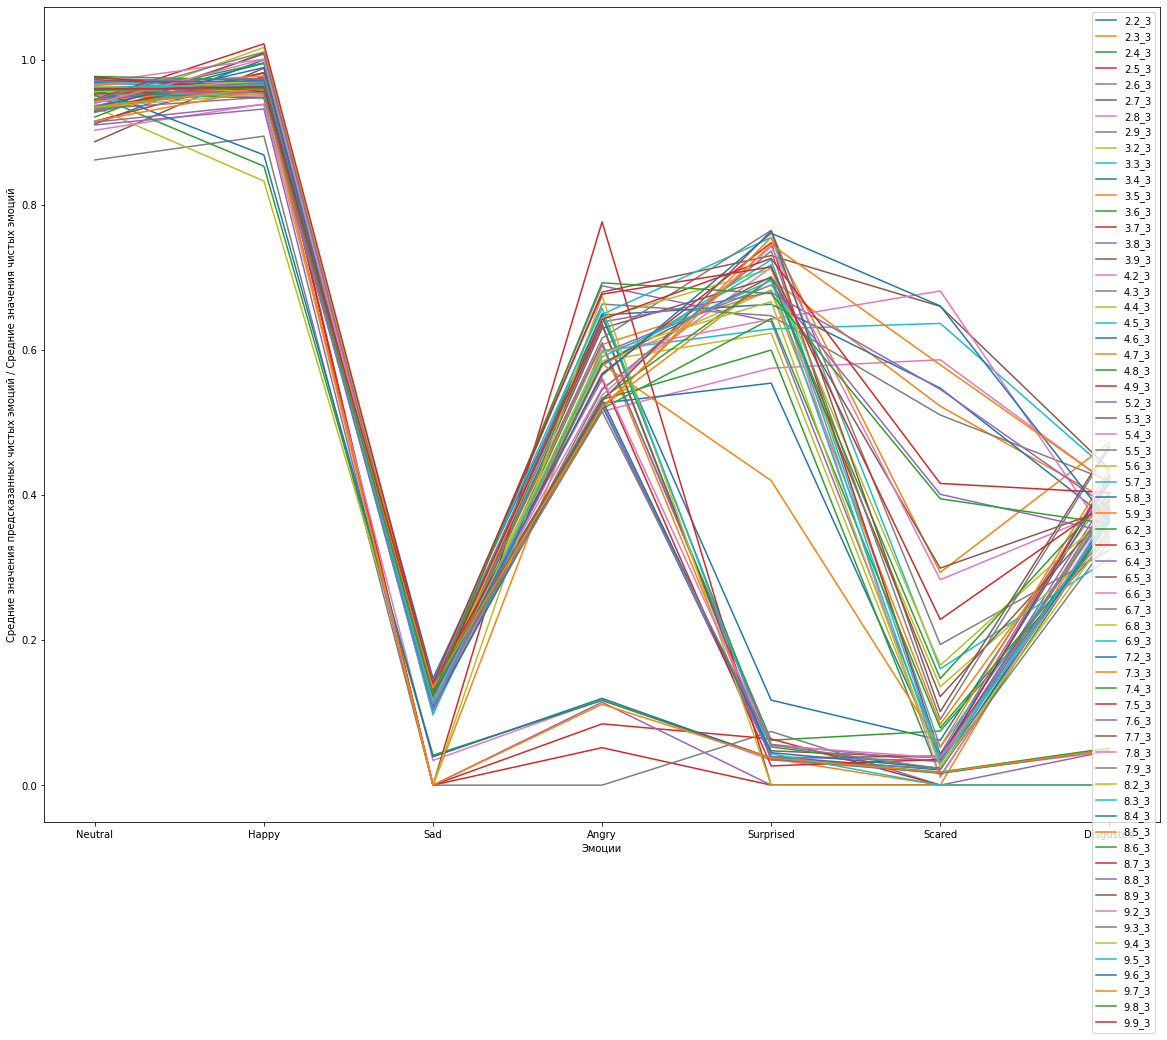

In [28]:
kwargs = {
    'models': models_3, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_3,
    'scale': True
}
df_clear_metrics_3 = tools.plot_emotions(**kwargs)

In [98]:
df_clear_metrics_3.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
54  8.8_3  0.957149  0.954027  0.104467  0.595623   0.689358  0.400790   
31  5.9_3  0.958554  0.950839  0.119584  0.518622   0.755033  0.293214   
63  9.9_3  0.959184  0.961804  0.140789  0.676626   0.714235  0.228307   
6   2.8_3  0.950960  0.947716  0.139645  0.515073   0.574687  0.586216   
21  4.7_3  0.942681  0.964035  0.114351  0.521525   0.697893  0.522301   
62  9.8_3  0.957864  0.960016  0.124647  0.692328   0.677450  0.394660   
53  8.7_3  0.975890  0.955508  0.127705  0.641734   0.725975  0.415813   
30  5.8_3  0.960700  0.969601  0.123021  0.647839   0.662794  0.547221   
27  5.5_3  0.974736  0.966417  0.109179  0.663057   0.646988  0.510111   
61  9.7_3  0.935005  0.960596  0.134079  0.521033   0.745260  0.579340   
36  6.6_3  0.965929  0.969977  0.099086  0.596377   0.642047  0.681035   
19  4.5_3  0.940727  0.972909  0.104037  0.598692   0.628751  0.636355   
44  7.6_3  0.970338  0.974017  0.138018  0.638303   0.679026  0.545471   
60  9.6_3  0.968857  0.970653  0.122579  0.564805   0.760682  0.660460   
15  3.9_3  0.927938  0.981666  0.129872  0.679537   0.729842  0.659894   

    Disgusted     clear  
54   0.348682  0.578585  
31   0.472214  0.581151  
63   0.391369  0.581759  
6    0.414894  0.589884  
21   0.391209  0.593428  
62   0.360205  0.595310  
53   0.402930  0.606508  
30   0.365266  0.610920  
27   0.419379  0.612838  
61   0.415565  0.612983  
36   0.338960  0.613344  
19   0.432033  0.616215  
44   0.382055  0.618175  
60   0.362764  0.630115  
15   0.435608  0.649194

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [99]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_3/df_clear_metrics_3.db'

In [100]:
tools.save_to_db(db_path, name_db, df_clear_metrics_3)

In [101]:
df_clear_metrics_3

model   Neutral     Happy           Sad     Angry     Surprised  \
0   2.2_3  0.911102  0.999804  1.470983e-01  0.645239  1.171304e-01   
1   2.3_3  0.931721  0.981498  6.553812e-10  0.606205  3.664173e-02   
2   2.4_3  0.949809  0.957608  1.086554e-01  0.608900  6.190834e-02   
3   2.5_3  0.914939  0.976490  2.874756e-16  0.051606  1.464781e-09   
4   2.6_3  0.931887  0.948182  1.315304e-01  0.688183  6.387061e-01   
..    ...       ...       ...           ...       ...           ...   
59  9.5_3  0.961571  0.965072  1.125772e-01  0.590433  6.954321e-01   
60  9.6_3  0.968857  0.970653  1.225790e-01  0.564805  7.606825e-01   
61  9.7_3  0.935005  0.960596  1.340790e-01  0.521033  7.452597e-01   
62  9.8_3  0.957864  0.960016  1.246473e-01  0.692328  6.774503e-01   
63  9.9_3  0.959184  0.961804  1.407891e-01  0.676626  7.142345e-01   

          Scared     Disgusted     clear  
0   6.191474e-02  4.197287e-01  0.471717  
1   4.455040e-07  3.905085e-01  0.420939  
2   7.458245e-02  3.423049e-01  0.443395  
3   1.023843e-13  2.645317e-13  0.277577  
4   4.303380e-02  4.273196e-01  0.544120  
..           ...           ...       ...  
59  3.051735e-02  3.682827e-01  0.531984  
60  6.604604e-01  3.627641e-01  0.630115  
61  5.793400e-01  4.155649e-01  0.612983  
62  3.946602e-01  3.602054e-01  0.595310  
63  2.283072e-01  3.913687e-01  0.581759  

[64 rows x 9 columns]

In [102]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0   2.2_3  0.911102498835704  0.999804310013475     0.147098281587549   
1   2.3_3  0.931721338084046  0.981498267701176  6.55381234402961e-10   
2   2.4_3  0.949808592016684  0.957608314199675     0.108655413432658   
3   2.5_3  0.914939083987826  0.976490395715089  2.87475569920842e-16   
4   2.6_3  0.931887109320026  0.948181773806567     0.131530425675131   
..    ...                ...                ...                   ...   
59  9.5_3    0.9615714147544  0.965071863662016     0.112577192426295   
60  9.6_3  0.968856954117117  0.970653363554633     0.122579019487188   
61  9.7_3  0.935005129393472  0.960596301689623     0.134078965842629   
62  9.8_3  0.957863796582196  0.960015765744227      0.12464726287665   
63  9.9_3  0.959183943955405  0.961804035427845     0.140789094515346   

                 Angry             Surprised                Scared  \
0    0.645239016556267     0.117130427413553    0.0619147411164116   
1    0.606205360474915    0.0366417314440447  4.45503970098014e-07   
2      0.6089001247179    0.0619083407378346    0.0745824519910065   
3   0.0516061215306107  1.46478127287931e-09  1.02384273753208e-13   
4    0.688183382762077     0.638706100906574     0.043033804817527   
..                 ...                   ...                   ...   
59   0.590432583242481     0.695432056727883    0.0305173535119085   
60   0.564805301234491     0.760682491563608     0.660460369259704   
61   0.521032718404728     0.745259696530998     0.579339967054479   
62   0.692327648505586     0.677450321216066     0.394660205233331   
63   0.676626235490085     0.714234546955631     0.228307220865698   

               Disgusted              clear  
0       0.41972866769379  0.471716849030964  
1      0.390508469501054  0.420939373337798  
2       0.34230490670587  0.443395449114518  
3   2.64531735163497e-13  0.277576514671239  
4      0.427319589571113  0.544120312408431  
..                   ...                ...  
59     0.368282711667488  0.531983596570353  
60      0.36276412333388  0.630114517507232  
61     0.415564888585223  0.612982523928736  
62     0.360205350006708  0.595310050023538  
63     0.391368665834413  0.581759106149203  

[64 rows x 9 columns]

### Загрузка всех 64 моделей // layer = 'second' ; v = 4

In [103]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
path_to_saved_models

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models'

In [104]:
v = 4
models_4 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_4

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['2.2_4', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f71a0d9f760>],
 ['2.3_4', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f715ec1cf10>],
 ['2.4_4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f7161adf6a0>],
 ['2.5_4', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f71618cee20>],
 ['2.6_4', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f71a0b462b0>],
 ['2.7_4', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f715f5649d0>],
 ['2.8_4', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f715d6a80d0>],
 ['2.9_4', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f715d419280>],
 ['3.2_4', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f715f952820>],
 ['3.3_4', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f71619e0d60>],
 ['3.4_4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f7160d94040>],
 ['3.5_4', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f715e009e20>],
 ['3.6_4', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [105]:
df_metrics_4 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_4

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [35]:
df_metrics_4 = tools.create_df_metrics(models_4, test, df_metrics_4, layer=layer)
df_metrics_4

model   layer    N      mean      norm      stat
0   2.2_4  second  2.2  0.107045  0.300008  0.467366
1   2.3_4  second  2.3  0.087175  0.230128  0.454198
2   2.4_4  second  2.4  0.091002  0.246020  0.460542
3   2.5_4  second  2.5  0.130244  0.391094  0.461988
4   2.6_4  second  2.6  0.083683  0.221168  0.499215
..    ...     ...  ...       ...       ...       ...
59  9.5_4  second  9.5  0.068835  0.192450  0.495256
60  9.6_4  second  9.6  0.075776  0.208541  0.495170
61  9.7_4  second  9.7  0.072747  0.204692  0.508613
62  9.8_4  second  9.8  0.070829  0.197742  0.518034
63  9.9_4  second  9.9  0.079833  0.217725  0.540178

[64 rows x 6 columns]

In [107]:
df_metrics_4.sort_values('mean')[:15]

model   layer    N      mean      norm      stat
59  9.5_4  second  9.5  0.068835  0.192450  0.495256
35  6.5_4  second  6.5  0.069509  0.193074  0.505363
27  5.5_4  second  5.5  0.069751  0.193741  0.508436
62  9.8_4  second  9.8  0.070829  0.197742  0.518034
26  5.4_4  second  5.4  0.071187  0.192651  0.489943
9   3.3_4  second  3.3  0.071894  0.206389  0.479704
39  6.9_4  second  6.9  0.072125  0.197491  0.482861
54  8.8_4  second  8.8  0.072142  0.203202  0.491749
19  4.5_4  second  4.5  0.072221  0.207978  0.509097
41  7.3_4  second  7.3  0.072498  0.197998  0.483236
21  4.7_4  second  4.7  0.072650  0.202156  0.500005
36  6.6_4  second  6.6  0.072740  0.197534  0.495097
61  9.7_4  second  9.7  0.072747  0.204692  0.508613
20  4.6_4  second  4.6  0.072867  0.206467  0.491876
42  7.4_4  second  7.4  0.073113  0.202788  0.485507

### Сохранение df_metrics с помощью tools.save_to_db

In [108]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_4/df_metrics_4.db'

In [109]:
tools.save_to_db(db_path, name_db, df_metrics_4)

In [110]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model   layer    N                mean               norm  \
0   2.2_4  second  2.2   0.107044664807444  0.300008059983154   
1   2.3_4  second  2.3  0.0871753338914058  0.230128170002515   
2   2.4_4  second  2.4   0.091001666944645  0.246020361830553   
3   2.5_4  second  2.5   0.130243554457198  0.391093864941188   
4   2.6_4  second  2.6  0.0836834784668429  0.221168402327296   
..    ...     ...  ...                 ...                ...   
59  9.5_4  second  9.5   0.068835471739296  0.192449927432653   
60  9.6_4  second  9.6   0.075775838457421  0.208540857249213   
61  9.7_4  second  9.7   0.072746785074289  0.204692428455137   
62  9.8_4  second  9.8  0.0708288389577821  0.197742190691355   
63  9.9_4  second  9.9  0.0798331841036097  0.217725370365138   

                 stat  
0   0.467366129159927  
1   0.454197734594345  
2   0.460542261600494  
3   0.461988359689713  
4   0.499214828014374  
..                ...  
59  0.495256245136261  
60  0.495170056819916  
61  0.508613109588623  
62  0.518033683300018  
63  0.540178418159485  

[64 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [111]:
df_clear_metrics_4 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_4

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

In [112]:
len(models_4)

64

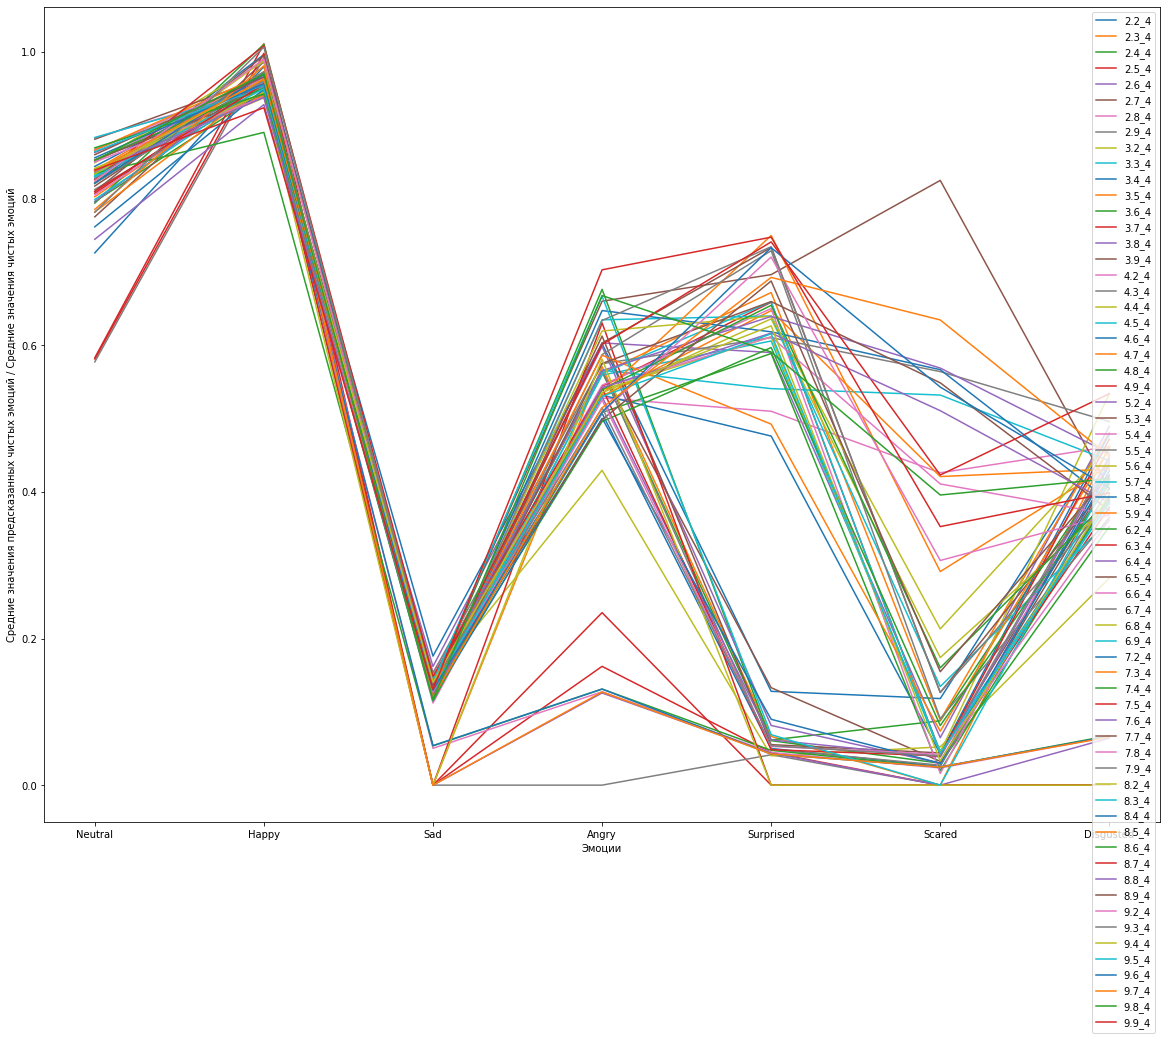

In [42]:
kwargs = {
    'models': models_4, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_4,
    'scale': True
}
df_clear_metrics_4 = tools.plot_emotions(**kwargs)

In [116]:
df_clear_metrics_4.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
31  5.9_4  0.781912  0.955752  0.140044  0.533350   0.749808  0.291346   
6   2.8_4  0.851012  0.961798  0.154071  0.528109   0.509967  0.426075   
21  4.7_4  0.839597  0.940829  0.119277  0.530415   0.647264  0.420930   
54  8.8_4  0.836906  0.938334  0.121155  0.542151   0.616625  0.510786   
62  9.8_4  0.852213  0.970059  0.116740  0.667839   0.590760  0.395771   
19  4.5_4  0.831110  0.960140  0.143117  0.565935   0.540871  0.532099   
45  7.7_4  0.852788  0.942899  0.119712  0.575155   0.659622  0.548776   
63  9.9_4  0.838955  0.924005  0.130609  0.702910   0.747432  0.352663   
60  9.6_4  0.855775  0.956715  0.129386  0.508971   0.733150  0.542975   
30  5.8_4  0.834725  0.968909  0.123945  0.647328   0.618325  0.566701   
44  7.6_4  0.862838  0.956011  0.139228  0.565357   0.639272  0.568928   
53  8.7_4  0.810063  0.956286  0.135843  0.601044   0.740994  0.423033   
61  9.7_4  0.837418  0.963096  0.119779  0.514699   0.692582  0.634537   
27  5.5_4  0.867150  0.955610  0.152598  0.574838   0.610460  0.564082   
15  3.9_4  0.817174  0.970017  0.140063  0.660061   0.696380  0.824882   

    Disgusted     clear  
31   0.435624  0.555405  
6    0.461815  0.556121  
21   0.431046  0.561337  
54   0.385200  0.564451  
62   0.417982  0.573052  
19   0.442415  0.573670  
45   0.374637  0.581941  
63   0.398763  0.585048  
60   0.405267  0.590320  
30   0.387386  0.592474  
44   0.452473  0.597730  
53   0.533904  0.600167  
61   0.448868  0.601568  
27   0.495940  0.602954  
15   0.403853  0.644633

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [117]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_4/df_clear_metrics_4.db'

In [119]:
tools.save_to_db(db_path, name_db, df_clear_metrics_4)

In [121]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0   2.2_4  0.726042730172183  0.980208224028173     0.176010263136185   
1   2.3_4  0.838932394373049  0.972775565230192  4.90015745008156e-10   
2   2.4_4  0.796011696788432  0.945747602489045     0.136040495900458   
3   2.5_4  0.582950398444545   1.01113075660507  6.68720684741022e-26   
4   2.6_4  0.829905192446626  0.941674140514755     0.161856030322104   
..    ...                ...                ...                   ...   
59  9.5_4  0.864100422171044  0.955115098700908     0.130564153855652   
60  9.6_4   0.85577529944992  0.956714570378934     0.129386389453891   
61  9.7_4  0.837417884027746  0.963095773525476     0.119779329811903   
62  9.8_4  0.852213012464048  0.970058881191151     0.116740161237173   
63  9.9_4  0.838954963594535  0.924005071521978      0.13060891873863   

                Angry             Surprised                Scared  \
0   0.602130990045074     0.127956196096227     0.118089569549935   
1   0.570912511373763    0.0664729151235346  3.97846853500743e-09   
2   0.563981858546147    0.0616449117142762    0.0877325441323075   
3   0.235278305957309  5.86824131544733e-15   1.1392923314856e-23   
4   0.603203901471168     0.590121211733894    0.0647241432292789   
..                ...                   ...                   ...   
59  0.530116048966433     0.615677811189854    0.0430580484224301   
60  0.508970666237723      0.73315042683944     0.542975465456645   
61  0.514698746324003     0.692581533971472      0.63453684834873   
62  0.667838888936171      0.59076041873749     0.395770517050051   
63  0.702909688827177     0.747431558896635     0.352663064704222   

               Disgusted              clear  
0       0.47836593343518  0.458400558066137  
1      0.461127605129954  0.415745856528425  
2      0.435743049734949  0.432414594186516  
3   3.45094929054798e-21  0.261337065858133  
4      0.489434310865353  0.525845561511883  
..                   ...                ...  
59     0.385125250214705  0.503393833360147  
60     0.405266989756675  0.590319972510461  
61     0.448868408939016  0.601568360706907  
62     0.417982201879539  0.573052011642232  
63      0.39876268727936  0.585047993366077  

[64 rows x 9 columns]

### Загрузка всех 64 моделей // layer = 'second' ; v = 5

In [122]:
v = 5
models_5 = tools.load_models(path_to_saved_models, df, layer=layer, v=v)
models_5

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['2.2_5', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f715877e8e0>],
 ['2.3_5', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f716114dfd0>],
 ['2.4_5', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f7198bd4c40>],
 ['2.5_5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f715ff93b50>],
 ['2.6_5', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f71622cb580>],
 ['2.7_5', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f7158744ee0>],
 ['2.8_5', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f715c550be0>],
 ['2.9_5', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f71625472e0>],
 ['3.2_5', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f715c2ae0a0>],
 ['3.3_5', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f7158606220>],
 ['3.4_5', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f71611dbac0>],
 ['3.5_5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f71560838e0>],
 ['3.6_5', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [123]:
len(models_5)

64

### Вычисление df_metrics с помощью tools.create_df_metrics 

In [124]:
df_metrics_5 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_5

Empty DataFrame
Columns: [model, layer, N, mean, norm, stat]
Index: []

In [50]:
df_metrics_5 = tools.create_df_metrics(models_5, test, df_metrics_5, layer=layer)
df_metrics_5

model   layer    N      mean      norm      stat
0   2.2_5  second  2.2  0.078289  0.214014  0.507822
1   2.3_5  second  2.3  0.067130  0.182908  0.480687
2   2.4_5  second  2.4  0.062440  0.169979  0.480935
3   2.5_5  second  2.5  0.085538  0.249614  0.485652
4   2.6_5  second  2.6  0.062360  0.169063  0.548877
..    ...     ...  ...       ...       ...       ...
59  9.5_5  second  9.5  0.053527  0.147115  0.526611
60  9.6_5  second  9.6  0.050940  0.140930  0.520589
61  9.7_5  second  9.7  0.054568  0.153311  0.554506
62  9.8_5  second  9.8  0.051190  0.142700  0.563049
63  9.9_5  second  9.9  0.050219  0.139397  0.569504

[64 rows x 6 columns]

In [126]:
df_metrics_5.sort_values('mean')

model   layer    N      mean      norm      stat
35  6.5_5  second  6.5  0.050128  0.138740  0.529377
63  9.9_5  second  9.9  0.050219  0.139397  0.569504
30  5.8_5  second  5.8  0.050612  0.141582  0.559874
55  8.9_5  second  8.9  0.050621  0.139899  0.524054
53  8.7_5  second  8.7  0.050669  0.139499  0.545283
..    ...     ...  ...       ...       ...       ...
24  5.2_5  second  5.2  0.084312  0.230442  0.489063
16  4.2_5  second  4.2  0.084487  0.227757  0.493763
3   2.5_5  second  2.5  0.085538  0.249614  0.485652
13  3.7_5  second  3.7  0.088177  0.252570  0.488006
7   2.9_5  second  2.9  0.093322  0.272102  0.522092

[64 rows x 6 columns]

### Сохранение df_metrics с помощью tools.save_to_db

In [127]:
name_db = 'df_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_5/df_metrics_5.db'

In [129]:
tools.save_to_db(db_path, name_db, df_metrics_5)

In [130]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model   layer    N                mean               norm  \
0   2.2_5  second  2.2   0.078288866930752  0.214013537081444   
1   2.3_5  second  2.3  0.0671301471251982  0.182908444784431   
2   2.4_5  second  2.4   0.062439912152956  0.169978745240134   
3   2.5_5  second  2.5   0.085537606727829  0.249613651221362   
4   2.6_5  second  2.6  0.0623601770234475  0.169063290724588   
..    ...     ...  ...                 ...                ...   
59  9.5_5  second  9.5  0.0535267180562294  0.147115388667942   
60  9.6_5  second  9.6  0.0509397450573917  0.140929614975234   
61  9.7_5  second  9.7  0.0545678532288276  0.153311266001328   
62  9.8_5  second  9.8  0.0511900853752109  0.142699718802754   
63  9.9_5  second  9.9  0.0502186964024779  0.139397128638758   

                 stat  
0   0.507821500301361  
1   0.480686992406845  
2   0.480934798717499  
3    0.48565199971199  
4   0.548876881599426  
..                ...  
59  0.526611030101776  
60   0.52058869600296  
61  0.554505944252014  
62  0.563049137592316  
63  0.569503605365753  

[64 rows x 6 columns]

### Вычисление df_clear_metrics и построение графиков с помощью tools.plot_emotions

In [131]:
df_clear_metrics_5 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_5

Empty DataFrame
Columns: [model, Neutral, Happy, Sad, Angry, Surprised, Scared, Disgusted, clear]
Index: []

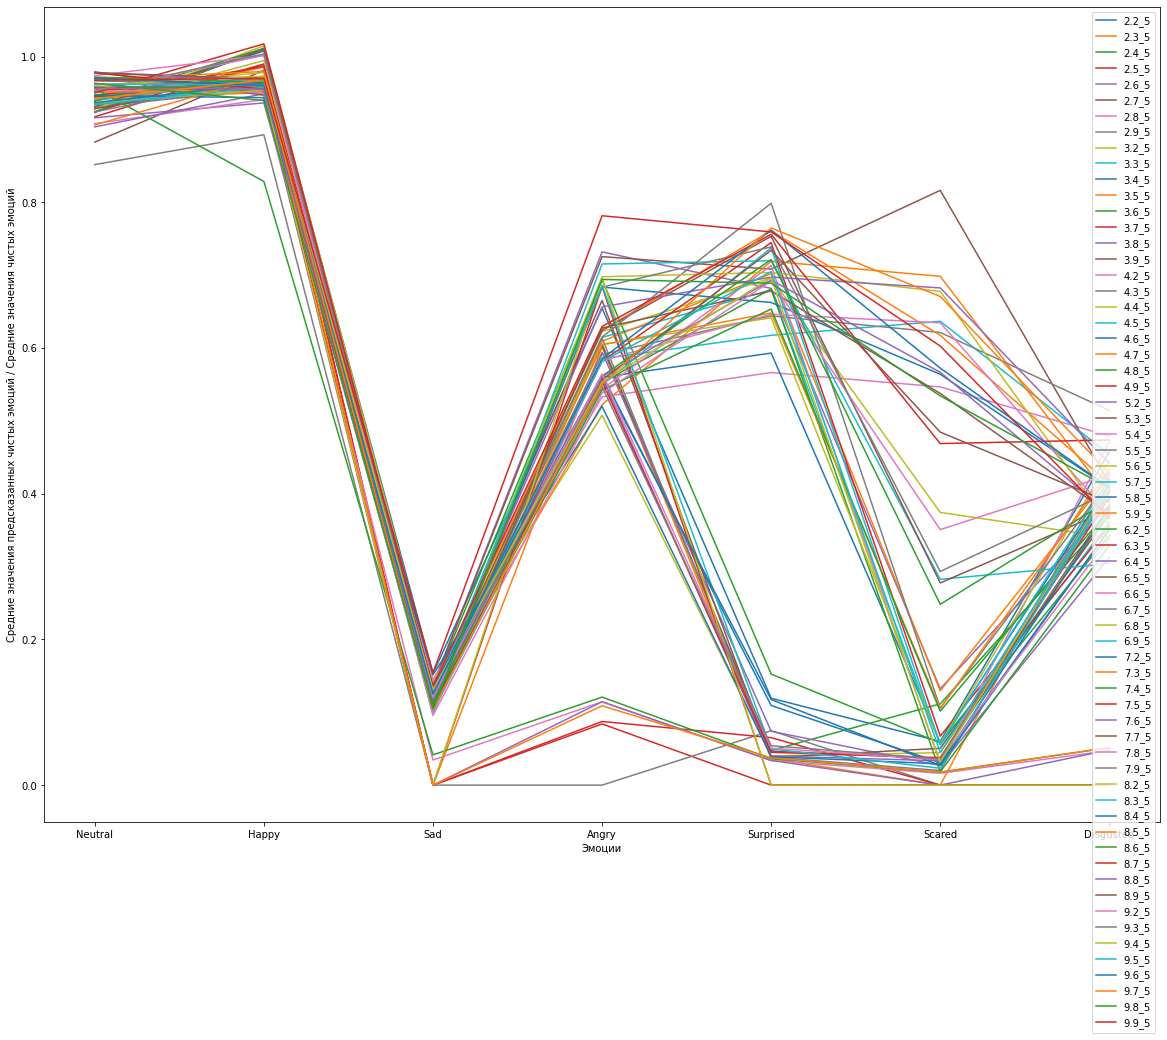

In [56]:
kwargs = {
    'models': models_5, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_5,
    'scale': True
}
df_clear_metrics_5 = tools.plot_emotions(**kwargs)

In [134]:
df_clear_met4rics_5.sort_values('clear')[-15:]

model   Neutral     Happy       Sad     Angry  Surprised    Scared  \
45  7.7_5  0.958005  0.953385  0.107161  0.627545   0.678369  0.537679   
36  6.6_5  0.970177  0.949539  0.099818  0.582718   0.646368  0.634633   
19  4.5_5  0.939591  0.969357  0.113501  0.585409   0.617514  0.636728   
62  9.8_5  0.963462  0.939750  0.104992  0.694184   0.688991  0.534319   
21  4.7_5  0.943389  0.950312  0.114980  0.522277   0.719187  0.698421   
30  5.8_5  0.967033  0.962084  0.107984  0.683699   0.662557  0.564022   
60  9.6_5  0.970491  0.960604  0.125196  0.585430   0.761787  0.572405   
53  8.7_5  0.977500  0.955434  0.135462  0.629642   0.756114  0.468877   
61  9.7_5  0.942049  0.968012  0.103974  0.550379   0.764788  0.670781   
27  5.5_5  0.977555  0.967747  0.121151  0.591163   0.644133  0.621362   
31  5.9_5  0.951025  0.954402  0.131801  0.624528   0.761062  0.617401   
38  6.8_5  0.957903  0.978164  0.117791  0.697871   0.703756  0.677739   
44  7.6_5  0.970013  0.972046  0.124747  0.656451   0.697355  0.682540   
63  9.9_5  0.967642  0.970276  0.154161  0.781607   0.759393  0.602744   
15  3.9_5  0.928638  0.968159  0.136863  0.725494   0.708283  0.816450   

    Disgusted     clear  
45   0.372491  0.604948  
36   0.371415  0.607810  
19   0.453875  0.616568  
62   0.407675  0.619053  
21   0.394302  0.620410  
30   0.407899  0.622183  
60   0.408241  0.626308  
53   0.473872  0.628129  
61   0.428262  0.632606  
27   0.514292  0.633915  
31   0.413838  0.636294  
38   0.356765  0.641427  
44   0.441739  0.649270  
63   0.366527  0.657479  
15   0.414792  0.671240

### Сохранение df_clear_metrics с помощью tools.save_to_db

In [135]:
name_db = 'df_clear_metrics'
dir_metric = 'model_metrics'
path_dir_metric = os.path.join(project_dir_path, dir_metric, layer, f'_{v}')
db_path = os.path.join(path_dir_metric, f'{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/second/_5/df_clear_metrics_5.db'

In [136]:
tools.save_to_db(db_path, name_db, df_clear_metrics_5)

In [137]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

model            Neutral              Happy                   Sad  \
0   2.2_5   0.92332096434681   1.01026119092036     0.153387549278664   
1   2.3_5  0.929885140290721  0.985907290921857  1.24108983787314e-10   
2   2.4_5  0.947603195826602  0.966155448211196     0.124190687519246   
3   2.5_5  0.924479720494679  0.989850217029664  6.62039963592584e-14   
4   2.6_5  0.931315396264709  0.955199754762097     0.137571874775713   
..    ...                ...                ...                   ...   
59  9.5_5  0.962306709040377  0.961361790600111     0.124704359592235   
60  9.6_5   0.97049106308625  0.960604187281158     0.125196120346027   
61  9.7_5  0.942049342336692  0.968011755560619     0.103974367142101   
62  9.8_5  0.963461693512418  0.939749991010061     0.104991660679199   
63  9.9_5  0.967642474500567  0.970275963053984     0.154161049427963   

                 Angry            Surprised                Scared  \
0    0.654781930226846    0.119291440097717    0.0599624735175395   
1    0.601473717038523    0.036499559454739  1.31252443336552e-07   
2    0.605473969057811   0.0476593538714913     0.111597951720743   
3   0.0840552504171151  1.8588342354813e-08  8.05207361163335e-12   
4    0.732004439399568    0.681908056916588     0.132246300870297   
..                 ...                  ...                   ...   
59   0.581698974066326    0.704969835413919    0.0448684664625748   
60   0.585430294379609    0.761787000010625     0.572405434122273   
61   0.550378896252556    0.764788377608087      0.67078079663071   
62   0.694184097414673    0.688990716556446     0.534319351701176   
63   0.781607099286038    0.759392583262515     0.602744081441094   

               Disgusted              clear  
0      0.457811622848352  0.482688167319469  
1      0.433165009004356  0.426704406869535  
2      0.369332443312883  0.453144721359996  
3   1.31950746311842e-11  0.285483600935873  
4      0.384495268275765   0.56496301303782  
..                   ...                ...  
59     0.405136002489872  0.540720876809345  
60      0.40824131746859  0.626307916670648  
61     0.428261952057123  0.632606498226841  
62     0.407675042266766  0.619053221877248  
63     0.366527295833584  0.657478649543678  

[64 rows x 9 columns]

In [141]:
df_clear_metrics_5

model   Neutral     Happy           Sad     Angry     Surprised  \
0   2.2_5  0.923321  1.010261  1.533875e-01  0.654782  1.192914e-01   
1   2.3_5  0.929885  0.985907  1.241090e-10  0.601474  3.649956e-02   
2   2.4_5  0.947603  0.966155  1.241907e-01  0.605474  4.765935e-02   
3   2.5_5  0.924480  0.989850  6.620400e-14  0.084055  1.858834e-08   
4   2.6_5  0.931315  0.955200  1.375719e-01  0.732004  6.819081e-01   
..    ...       ...       ...           ...       ...           ...   
59  9.5_5  0.962307  0.961362  1.247044e-01  0.581699  7.049698e-01   
60  9.6_5  0.970491  0.960604  1.251961e-01  0.585430  7.617870e-01   
61  9.7_5  0.942049  0.968012  1.039744e-01  0.550379  7.647884e-01   
62  9.8_5  0.963462  0.939750  1.049917e-01  0.694184  6.889907e-01   
63  9.9_5  0.967642  0.970276  1.541610e-01  0.781607  7.593926e-01   

          Scared     Disgusted     clear  
0   5.996247e-02  4.578116e-01  0.482688  
1   1.312524e-07  4.331650e-01  0.426704  
2   1.115980e-01  3.693324e-01  0.453145  
3   8.052074e-12  1.319507e-11  0.285484  
4   1.322463e-01  3.844953e-01  0.564963  
..           ...           ...       ...  
59  4.486847e-02  4.051360e-01  0.540721  
60  5.724054e-01  4.082413e-01  0.626308  
61  6.707808e-01  4.282620e-01  0.632606  
62  5.343194e-01  4.076750e-01  0.619053  
63  6.027441e-01  3.665273e-01  0.657479  

[64 rows x 9 columns]

In [142]:
df_clear_metrics_5.sort_values('clear')[:10]

model   Neutral     Happy           Sad         Angry     Surprised  \
7   2.9_5  0.851832  0.892825  6.589531e-17  1.088510e-10  7.470667e-02   
3   2.5_5  0.924480  0.989850  6.620400e-14  8.405525e-02  1.858834e-08   
24  5.2_5  0.903654  0.949124  2.529558e-08  1.144822e-01  3.389184e-02   
32  6.2_5  0.956568  0.828678  4.148557e-02  1.208692e-01  3.632569e-02   
13  3.7_5  0.917463  0.989547  4.818955e-10  8.737991e-02  6.514695e-02   
51  8.5_5  0.906377  0.972303  2.742082e-07  1.088995e-01  3.745538e-02   
16  4.2_5  0.908089  0.941062  3.442907e-02  1.144136e-01  3.378651e-02   
48  8.2_5  0.936311  0.954245  0.000000e+00  6.961484e-01  3.723373e-11   
33  6.3_5  0.953813  0.963420  0.000000e+00  6.844391e-01  1.957550e-04   
14  3.8_5  0.916111  0.936502  1.036484e-01  5.940100e-01  7.391908e-02   

          Scared     Disgusted     clear  
7   1.544430e-06  1.366693e-14  0.259909  
3   8.052074e-12  1.319507e-11  0.285484  
24  2.404012e-11  4.835444e-02  0.292787  
32  1.777864e-02  5.141307e-02  0.293303  
13  4.267849e-09  1.810673e-10  0.294219  
51  1.780559e-02  5.152491e-02  0.299195  
16  1.622669e-02  4.743245e-02  0.299348  
48  6.672650e-29  5.772524e-39  0.369529  
33  0.000000e+00  0.000000e+00  0.371695  
14  2.692337e-02  3.127467e-01  0.423409